In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import stats

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from preprocessing.step_size import *

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
mass_s, inj_s, sigma_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh_limits.txt", unpack=True)
mass2_s, inj2_s, sigma2_s = np.loadtxt(f"{WDIR}/outputs/limits/pbh-hr-1021.txt", unpack=True)

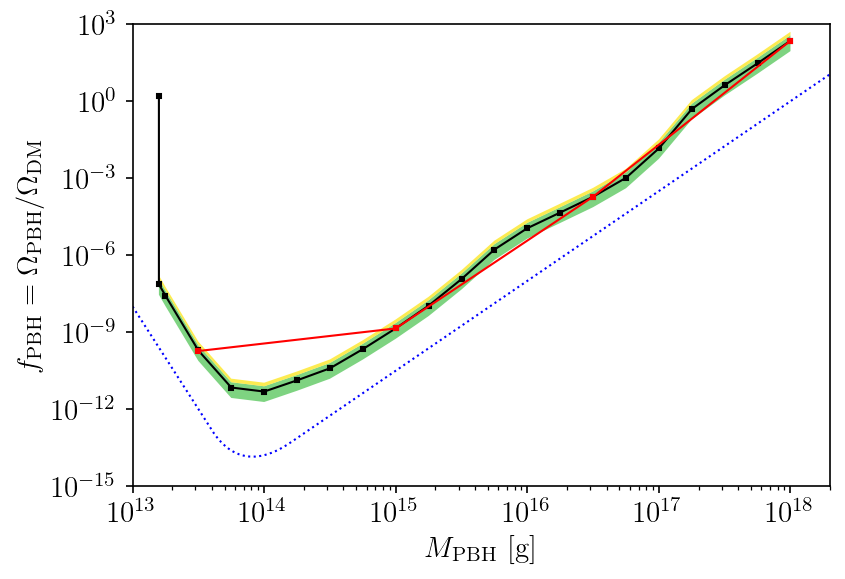

In [5]:
extras = False

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# our limits
one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass_s, upper_limit, 'k-s', lw=1, ms=2)
ax.fill_between(mass_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
ax.fill_between(mass_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

# our limits
one_sigma = inj2_s * sigma2_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma
ax.plot(mass2_s, upper_limit, 'r-s', lw=1, ms=2)
# ax.fill_between(mass2_s, upper_limit+one_sigma, upper_limit-one_sigma, color=mpl.colormaps['viridis'](0.75), alpha=0.8, ec='none')
# ax.fill_between(mass2_s, upper_limit+2*one_sigma, upper_limit+one_sigma, color=mpl.colormaps['viridis'](1.0), alpha=0.8, ec='none')

m_s = np.geomspace(1e13, 1e19, 1000)
ax.plot(m_s, pbh_hr_f(m_s), 'b:', lw=1)

ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'$M_\mathrm{PBH}$ [g]', ylabel=r'$f_\mathrm{PBH}=\Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')
ax.set(ylim=(1e-15, 1e3), xlim=(1e13, 2e18));